In [96]:
import requests
import json
import pandas as pd
from random import seed
from random import random
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
import matplotlib.pyplot as plt
from targets_plot_generator.src import generate_plot


pd.options.display.max_columns = None

asset = 'META'
model_case_version_main_target_code = '7'
dataset_start_date = '2000-01-01'
train_end_date = '2020-12-29'
test_end_date = '2024-05-01'
model_case_version_time_steps = '10'

In [97]:
query = f'''
    query {{
        featuresTargetsGenerator (
            asset: {json.dumps(asset)}
            model_case_version_main_target_code: {json.dumps(model_case_version_main_target_code)}
            dataset_start_date: {json.dumps(dataset_start_date)}
            train_end_date: {json.dumps(train_end_date)}
            test_end_date: {json.dumps(test_end_date)}
            model_case_version_time_steps: {json.dumps(model_case_version_time_steps)}
        ) {{
            success,
            error,
            train_dataframe,
            test_dataframe,
            dncp_train,
            dncp_test,
            dcp_train,
            dcp_test,
            generated_features,
            auxillary_targets,
            features,
            targets
        }}
    }} 
'''

headers = {
        'Accept-Encoding': 'gzip, deflate, br',
        'Content-Type': 'application/json',
        'Accept': 'application/json',
        'Connection': 'keep-alive',
        'DNT': '1'
    }

response = requests.post('http://0.0.0.0:8888/graphql',json={"query":query},headers=headers).json()
featuresTargetsGenerator = response['data']['featuresTargetsGenerator']
print(featuresTargetsGenerator.keys())

dict_keys(['auxillary_targets', 'dcp_test', 'dcp_train', 'dncp_test', 'dncp_train', 'error', 'features', 'generated_features', 'success', 'targets', 'test_dataframe', 'train_dataframe'])


In [98]:
train_dataframe = pd.DataFrame(json.loads(featuresTargetsGenerator['train_dataframe']))
test_dataframe = pd.DataFrame(json.loads(featuresTargetsGenerator['test_dataframe']))
dcp_train = featuresTargetsGenerator['dcp_train']
dcp_test = featuresTargetsGenerator['dcp_test']

In [99]:
train_dataframe.insert(0,"DCP", dcp_train)
test_dataframe.insert(0,"DCP", dcp_test)

train_dataframe.set_index('DCP', inplace=True)
test_dataframe.set_index('DCP', inplace=True)

train_dataframe = train_dataframe['OPCP']
test_dataframe = test_dataframe['OPCP']

In [100]:
predictions = list()
history = train_dataframe[-1]
for i in range(len(test_dataframe)):
    yhat = history + (-1 if random() < 0.5 else 1)
    predictions.append(yhat)
    history = test_dataframe[i]

/tmp/ipykernel_54978/137666927.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  history = train_dataframe[-1]
/tmp/ipykernel_54978/137666927.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  history = test_dataframe[i]


In [101]:
test_actuals = test_dataframe.tolist()

{'Comparision': {'trend_slope': 0.9954217059888466,
  'trend_intercept': 1.0711885097312006,
  'trend_r2': 0.9936506719073726,
  'dispersion': 0.018922000997605607},
 'Ratio': {'trend_slope': -1.6722153656328763e-05,
  'trend_intercept': 1.0044959774138713,
  'trend_r2': 0.002863525378138151,
  'dispersion': 0.018922320395132093},
 'Scatter': {'trend_slope': 0.9954217059888466,
  'trend_intercept': 1.0711885097312006,
  'trend_r2': 0.9936506719073726,
  'dispersion': 0.018922000997605607}}

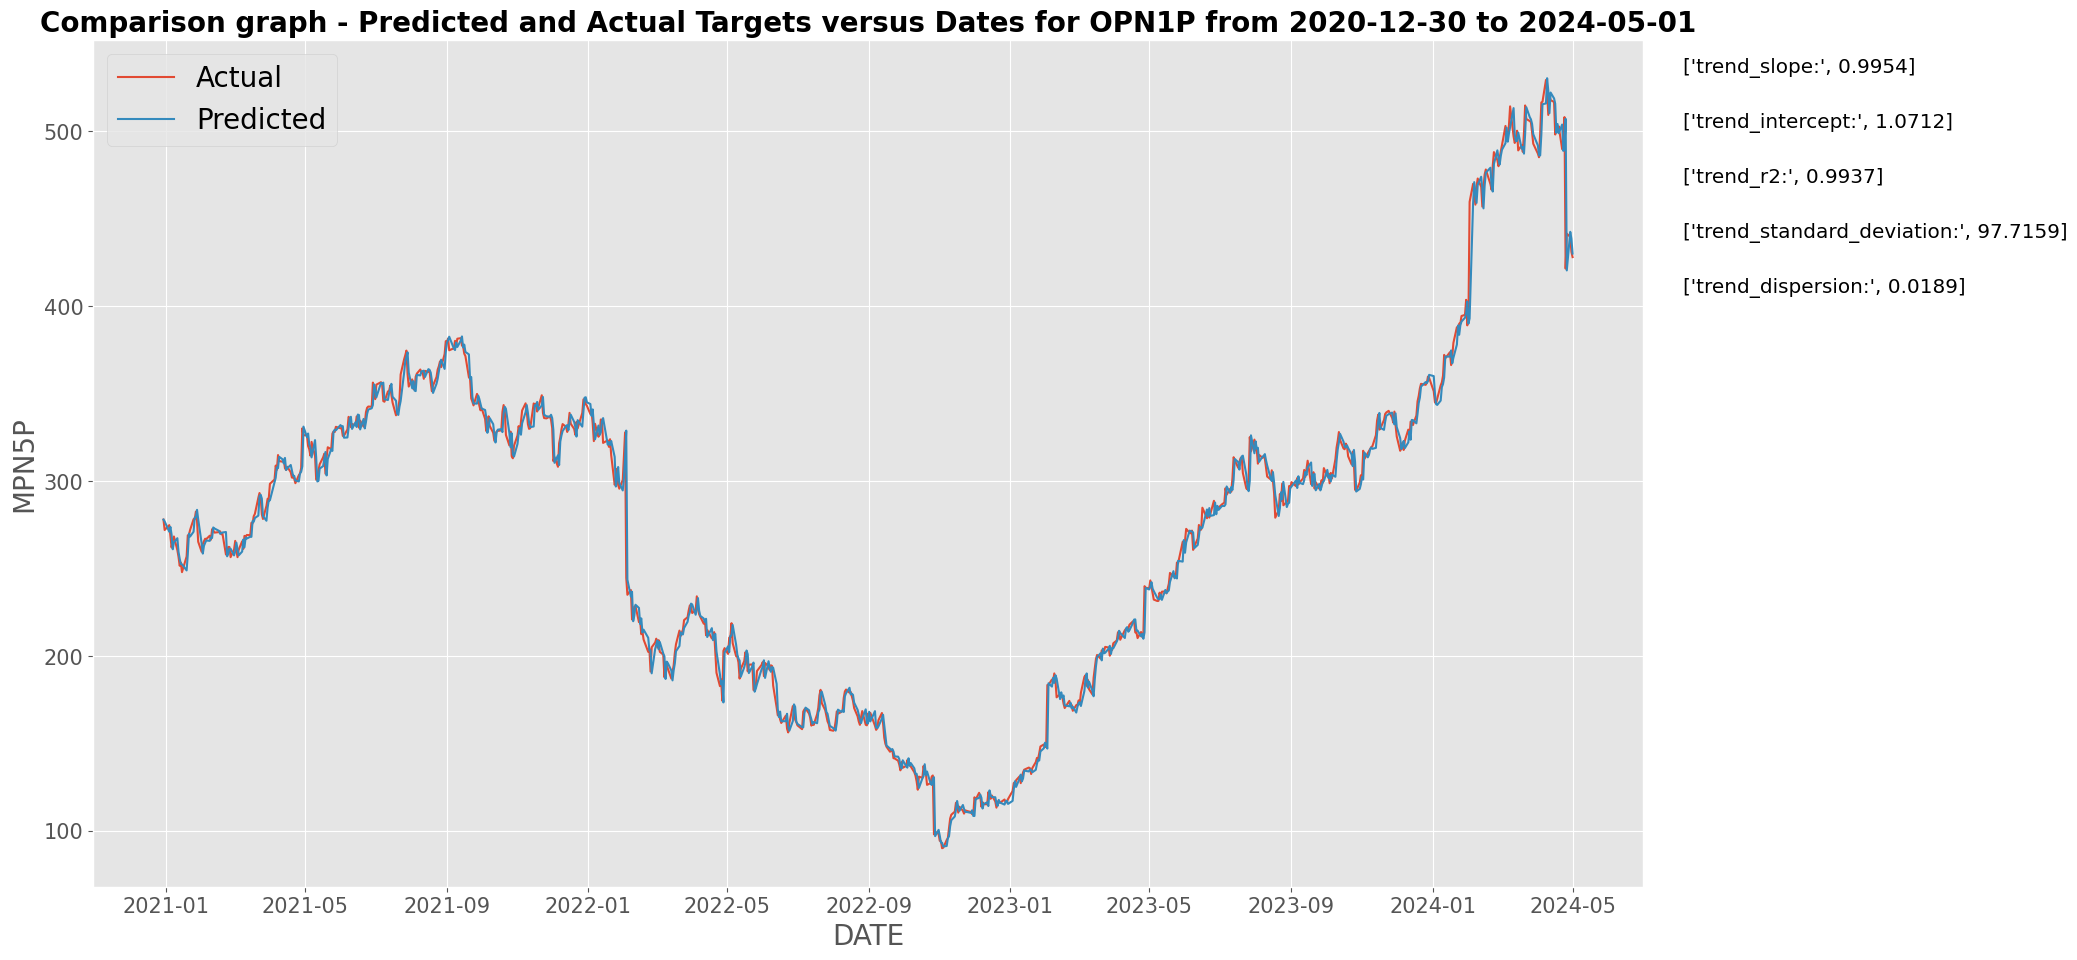

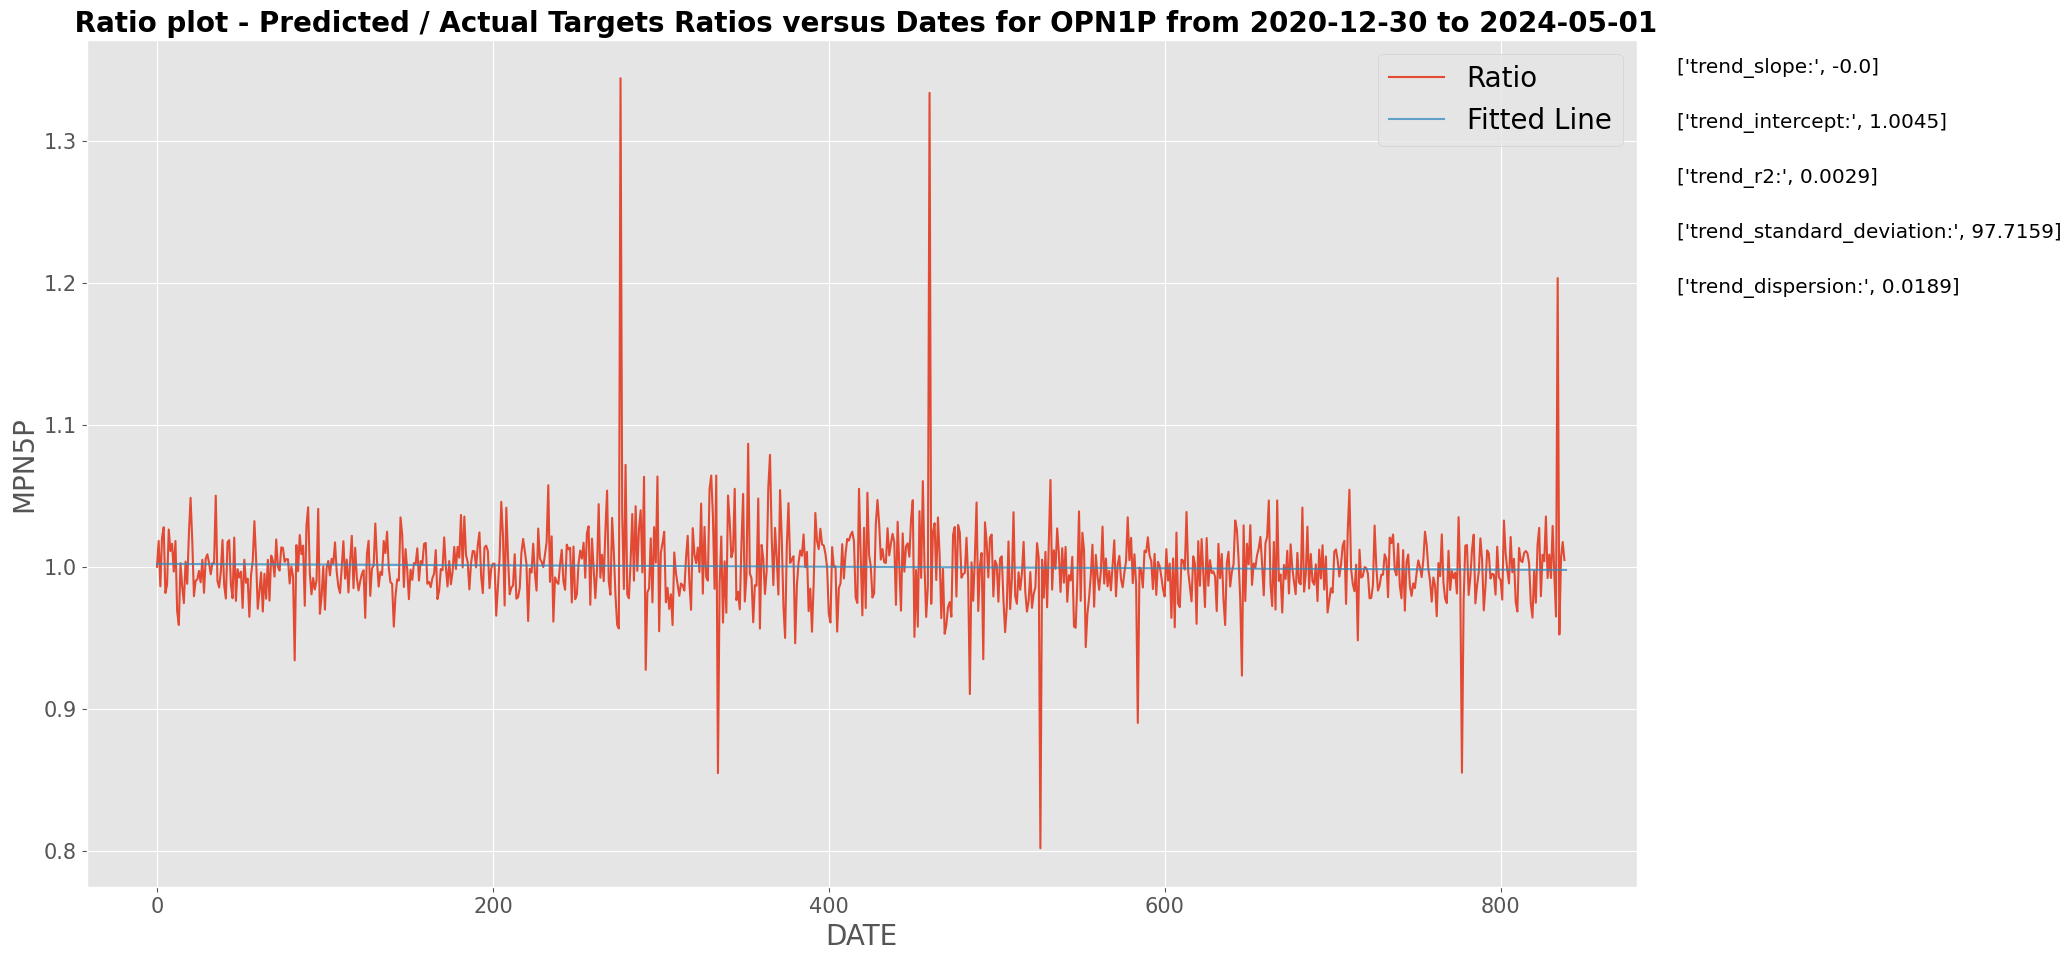

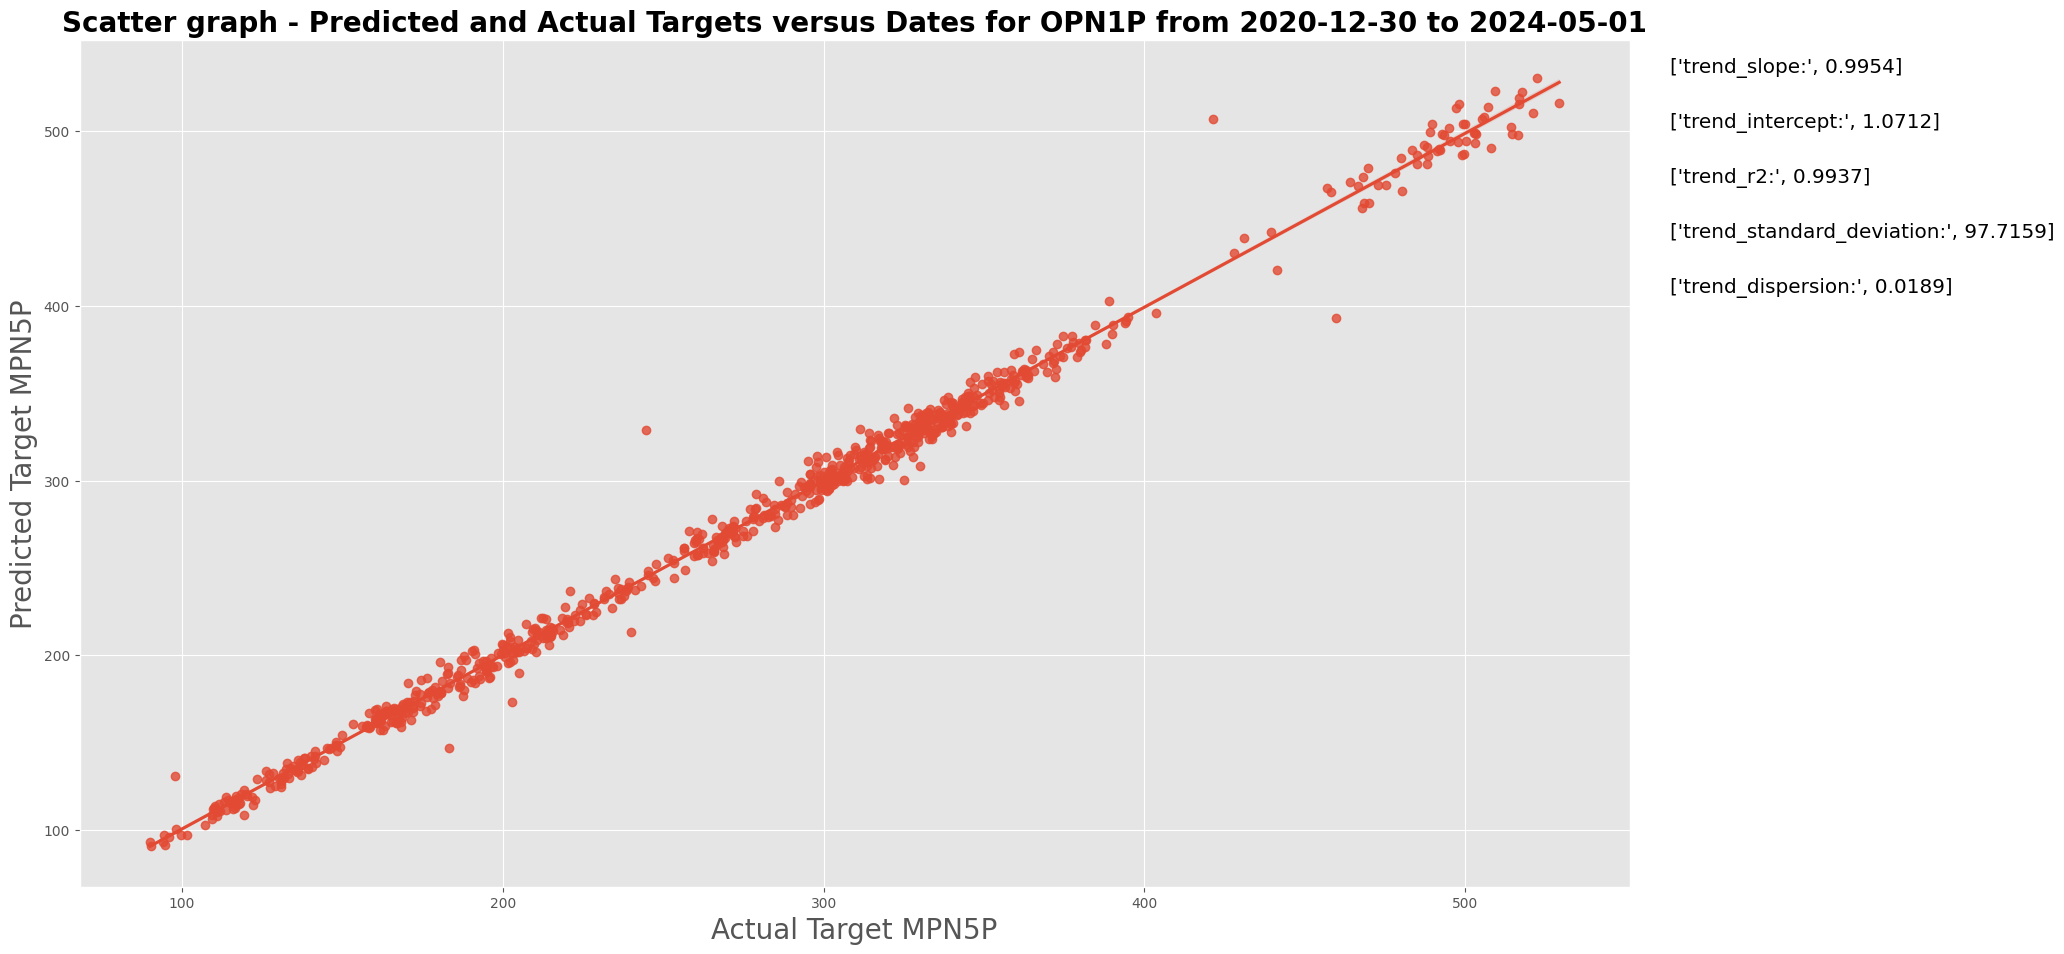

In [102]:
generate_plot(
    predicted_targets=predictions,
    actual_targets = test_actuals,
    dates = dcp_test,
    plot_path = '/home/ubuntu/LTM-Long-short_Term_Memory.Bot-API_0.00/plots/random_walk_forecast',
    target='OPN1P'
)

In [103]:
mean_absolute_percentage_error(test_actuals, predictions)

0.018979748939989556

In [104]:
mean_absolute_error(test_actuals,predictions)

4.872705601907032